In [2]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

import numpy as np
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

/home/hnsiah/miniforge/envs/CLIM/lib/python3.12/site-packages/pyproj/__init__.py:95: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [3]:
file_path = '/home/lortizur/clim680/project_data/'
file_name = 'tasmax.gfdl-esm4.1985-2014.nc'
ds = xr.open_dataset(file_path+file_name)

In [4]:
ds_monthly=ds.groupby('time.month').mean()


Text(0.5, 0.98, 'Monthly Maximum Temperature')

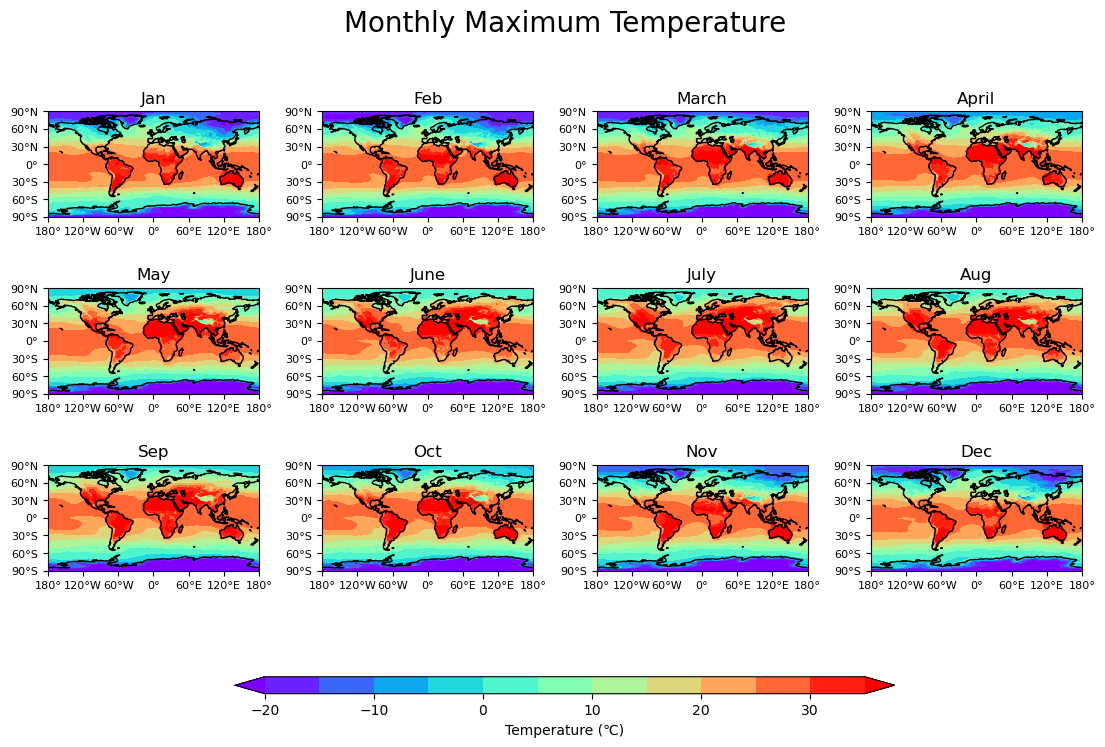

In [13]:
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=3,ncols=4,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

months = ['Jan', 'Feb', 'March', 'April', 'May','June','July', 'Aug', 'Sep','Oct','Nov','Dec']
#Loop over all of the seasons and plot

clevs=np.arange(-20,40,5)

for i,month in enumerate(ds_monthly['month']):

        # Select the season
        data=ds_monthly['tasmax'].sel(month=month)
        #print(np.shape(data))
        data = np.squeeze(data)
        #print(np.shape(data))
        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=ds_monthly['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,ds_monthly['lat'],data-273.15,
                          transform = ccrs.PlateCarree(),
                           levels=clevs,
                          cmap='rainbow',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)
        axs[i].tick_params(axis='both', labelsize=8)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(months[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.3, top=None, left=0.03, right=0.97,
                    wspace=0.3, hspace=0.27)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Temperature (℃)')

# Add a big title at the top
plt.suptitle('Monthly Maximum Temperature',fontsize=20)